# Import Required Libraries
Import libraries such as `scipy.io` for loading MATLAB files and `matplotlib` for visualization.

In [17]:
# Import necessary libraries
from scipy.io import loadmat  # For loading MATLAB files
import matplotlib.pyplot as plt  # For data visualization
import numpy as np  # For numerical operations

# Load MATLAB Files
Load the MATLAB files from the `P1` and `P3` directories using `scipy.io.loadmat`.

In [18]:
import os
import h5py
from scipy.io import loadmat

def load_mat_file(file_path):
    """
    Load a MATLAB file, handling both v7.3 (HDF5) and earlier formats.
    
    Args:
        file_path (str): Path to the MATLAB file.
    
    Returns:
        dict or h5py.File: Loaded data as a dictionary (for earlier formats) or HDF5 file object (for v7.3).
    """
    if not os.path.exists(file_path):
        print(f"Error: File not found - {file_path}")
        return None

    try:
        # Try loading as a non-v7.3 file
        data = loadmat(file_path)
        print(f"Loaded non-v7.3 file: {file_path}")
        return data
    except NotImplementedError:
        # If v7.3, use h5py
        try:
            with h5py.File(file_path, 'r') as f:
                print(f"Loaded v7.3 file: {file_path}")
                return {key: f[key] for key in f.keys()}
        except Exception as e:
            print(f"Error loading file {file_path}: {e}")
            return None

# Example usage
data_dir = "data"  # Base directory for your data
subdirs = ["P1", "P3"]  # Subdirectories to process

for subdir in subdirs:
    subdir_path = os.path.join(data_dir, subdir)
    if not os.path.exists(subdir_path):
        print(f"Error: Directory not found - {subdir_path}")
        continue

    for file_name in os.listdir(subdir_path):
        if file_name.endswith(".mat"):
            file_path = os.path.join(subdir_path, file_name)
            data = load_mat_file(file_path)
            if data is not None:
                print(f"Keys in {file_name}: {list(data.keys()) if isinstance(data, dict) else 'HDF5 keys'}")

Loaded non-v7.3 file: data/P1/135Deg_F1_1_plateau_iAll_MUedit.mat_decomp_100It_FDI_DEMUSEEDIT_cut.mat
Keys in 135Deg_F1_1_plateau_iAll_MUedit.mat_decomp_100It_FDI_DEMUSEEDIT_cut.mat: ['__header__', '__version__', '__globals__', 'IED', 'IPTs', 'MUPulses', 'SIG', 'SIGFileName', 'SIGFilePath', 'SIGlength', 'discardChannelsVec', 'fsamp', 'origRecMode', 'ref_signal', 'startSIGInt', 'stopSIGInt']
Loaded v7.3 file: data/P1/135Deg_F2_1_plateau_iAll_MUedit.mat_decomp_100It_FDI_DEMUSEEDIT.mat
Keys in 135Deg_F2_1_plateau_iAll_MUedit.mat_decomp_100It_FDI_DEMUSEEDIT.mat: ['#refs#', 'IED', 'IPTs', 'MUPulses', 'SIG', 'SIGFileName', 'SIGFilePath', 'SIGlength', 'discardChannelsVec', 'fsamp', 'origRecMode', 'ref_signal', 'startSIGInt', 'stopSIGInt']
Loaded v7.3 file: data/P1/180Deg_F2_1_plateau_iAll_MUedit.mat_decomp_100It_FDI_DEMUSEEDIT.mat
Keys in 180Deg_F2_1_plateau_iAll_MUedit.mat_decomp_100It_FDI_DEMUSEEDIT.mat: ['#refs#', 'IED', 'IPTs', 'MUPulses', 'SIG', 'SIGFileName', 'SIGFilePath', 'SIGlength',

# Explore Data Structure
Inspect the keys and structure of the loaded MATLAB data to understand its organization.

In [19]:
import os
import h5py
from scipy.io import loadmat

def load_mat_file(file_path):
    """
    Load a MATLAB file, handling both v7.3 (HDF5) and earlier formats.
    
    Args:
        file_path (str): Path to the MATLAB file.
    
    Returns:
        dict or h5py.File: Loaded data as a dictionary (for earlier formats) or HDF5 file object (for v7.3).
    """
    if not os.path.exists(file_path):
        print(f"Error: File not found - {file_path}")
        return None

    try:
        # Try loading as a non-v7.3 file
        data = loadmat(file_path)
        print(f"Loaded non-v7.3 file: {file_path}")
        return data
    except NotImplementedError:
        # If v7.3, use h5py
        try:
            with h5py.File(file_path, 'r') as f:
                print(f"Loaded v7.3 file: {file_path}")
                return {key: f[key] for key in f.keys()}
        except Exception as e:
            print(f"Error loading file {file_path}: {e}")
            return None

# Initialize dictionaries to store data
p1_data = {}
p3_data = {}

# Define directories
data_dir = "data"  # Base directory for your data
subdirs = {"P1": p1_data, "P3": p3_data}  # Map subdirectories to their respective dictionaries

# Load data into dictionaries
for subdir, data_dict in subdirs.items():
    subdir_path = os.path.join(data_dir, subdir)
    if not os.path.exists(subdir_path):
        print(f"Error: Directory not found - {subdir_path}")
        continue

    for file_name in os.listdir(subdir_path):
        if file_name.endswith(".mat"):
            file_path = os.path.join(subdir_path, file_name)
            data = load_mat_file(file_path)
            if data is not None:
                data_dict[file_name] = data

# Example: Explore keys in P1 and P3 data
print("\nKeys in P1 data:")
for file_name, data in p1_data.items():
    print(f"{file_name}: {list(data.keys()) if isinstance(data, dict) else 'HDF5 keys'}")

print("\nKeys in P3 data:")
for file_name, data in p3_data.items():
    print(f"{file_name}: {list(data.keys()) if isinstance(data, dict) else 'HDF5 keys'}")

# Explore Data Structure

# Inspect the keys and structure of the loaded MATLAB data for P1
print("Exploring P1 Data Structure:")
for file_path, mat_data in p1_data.items():
    print(f"\nFile: {file_path}")
    print("Keys:", mat_data.keys() if isinstance(mat_data, dict) else "HDF5 keys")
    print("Structure of first key:")
    first_key = list(mat_data.keys())[0] if isinstance(mat_data, dict) else list(mat_data.keys())[0]
    print(mat_data[first_key])

# Inspect the keys and structure of the loaded MATLAB data for P3
print("\nExploring P3 Data Structure:")
for file_path, mat_data in p3_data.items():
    print(f"\nFile: {file_path}")
    print("Keys:", mat_data.keys() if isinstance(mat_data, dict) else "HDF5 keys")
    print("Structure of first key:")
    first_key = list(mat_data.keys())[0] if isinstance(mat_data, dict) else list(mat_data.keys())[0]
    print(mat_data[first_key])

Loaded non-v7.3 file: data/P1/135Deg_F1_1_plateau_iAll_MUedit.mat_decomp_100It_FDI_DEMUSEEDIT_cut.mat
Loaded v7.3 file: data/P1/135Deg_F2_1_plateau_iAll_MUedit.mat_decomp_100It_FDI_DEMUSEEDIT.mat
Loaded v7.3 file: data/P1/180Deg_F2_1_plateau_iAll_MUedit.mat_decomp_100It_FDI_DEMUSEEDIT.mat
Loaded non-v7.3 file: data/P1/90Deg_F1_1_plateau_iAll_MUedit.mat_decomp_100It_FDI_DEMUSEEDIT_cut_C.mat
Loaded non-v7.3 file: data/P1/180Deg_F1_1_plateau_iAll_MUedit.mat_decomp_100It_FDI_DEMUSEEDIT_cut_C.mat
Loaded non-v7.3 file: data/P1/135Deg_F1_2_plateau_iAll_MUedit.mat_decomp_100It_FDI_DEMUSEEDIT_cut.mat
Loaded non-v7.3 file: data/P1/90Deg_F1_2_plateau_iAll_MUedit.mat_decomp_100It_FDI_DEMUSEEDIT_cut.mat
Loaded v7.3 file: data/P1/135Deg_F2_2_plateau_iAll_MUedit.mat_decomp_100It_FDI_DEMUSEEDIT.mat
Loaded non-v7.3 file: data/P1/90Deg_F2_2_plateau_iAll_MUedit.mat_decomp_100It_FDI_DEMUSEEDIT_cut_C.mat
Loaded v7.3 file: data/P1/180Deg_F2_2_plateau_iAll_MUedit.mat_decomp_100It_FDI_DEMUSEEDIT.mat
Loaded v7

In [20]:
p1_data

{'135Deg_F1_1_plateau_iAll_MUedit.mat_decomp_100It_FDI_DEMUSEEDIT_cut.mat': {'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Mar 20 10:27:28 2025',
  '__version__': '1.0',
  '__globals__': [],
  'IED': array([[1]], dtype=uint8),
  'IPTs': array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]], shape=(16, 609998)),
  'MUPulses': array([[array([[ 80497,  82152,  84080,  84862,  85891,  87608,  88682,  89158,
                   90208,  91183,  92101,  92952,  93316,  94421,  94621,  94742,
                   95591,  96209,  96918,  97565,  97780,  98936,  99283, 100456,
                  101206, 101894, 102901, 104671, 105526, 106344, 107293, 107937,
                  108484, 109399, 111376, 111974, 113014, 113587, 114480, 115364,
                  116756, 117447, 118100,

# Visualize Data
Plot relevant data from the MATLAB files to visualize the intramuscular EEG experiment results.

In [21]:
def plot_data(data, key, title):
    """
    Plot the data for a given key from the loaded MATLAB file.
    
    Args:
        data (dict or h5py.File): The loaded data from the MATLAB file.
        key (str): The key to visualize.
        title (str): The title of the plot.
    """
    if isinstance(data[key], h5py.Dataset):
        values = data[key][:]
    elif isinstance(data[key], h5py.Group):
        print(f"Key '{key}' is a group, not a dataset. Skipping.")
        return
    else:
        values = data[key]

    # Debug: Print the type and shape of the data
    print(f"Key '{key}' - Type: {type(values)}, Shape: {values.shape if hasattr(values, 'shape') else 'N/A'}")

    if not hasattr(values, 'shape') or values.size == 0:
        print(f"Key '{key}' contains no data or is not plottable. Skipping.")
        return

    if values.ndim > 2:
        print(f"Key '{key}' has {values.ndim} dimensions, which is not supported for plotting. Skipping.")
        return

    plt.figure(figsize=(10, 5))
    plt.plot(values)
    plt.title(title)
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.show()


def explore_hdf5_group(group, indent=0):
    """
    Recursively explore an HDF5 group and print its contents.
    
    Args:
        group (h5py.Group): The HDF5 group to explore.
        indent (int): Indentation level for printing.
    """
    for key in group.keys():
        item = group[key]
        if isinstance(item, h5py.Group):
            print("  " * indent + f"Group: {key}")
            explore_hdf5_group(item, indent + 1)
        elif isinstance(item, h5py.Dataset):
            print("  " * indent + f"Dataset: {key} - Shape: {item.shape}, Type: {item.dtype}")
        else:
            print("  " * indent + f"Unknown: {key}")

In [22]:
import matplotlib.pyplot as plt
import h5py

def plot_data(data, key, title):
    if isinstance(data[key], h5py.Dataset):
        values = data[key][:]
    elif isinstance(data[key], h5py.Group):
        print(f"Key '{key}' is a group, not a dataset. Skipping.")
        return
    else:
        values = data[key]

    print(f"Key '{key}' - Type: {type(values)}, Shape: {values.shape if hasattr(values, 'shape') else 'N/A'}")

    if not hasattr(values, 'shape') or values.size == 0:
        print(f"Key '{key}' contains no data or is not plottable. Skipping.")
        return

    if values.ndim > 2:
        print(f"Key '{key}' has {values.ndim} dimensions, which is not supported for plotting. Skipping.")
        return

    plt.figure(figsize=(10, 5))
    plt.plot(values)
    plt.title(title)
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.show()

def explore_hdf5_group(group, indent=0):
    for key in group.keys():
        item = group[key]
        if isinstance(item, h5py.Group):
            print("  " * indent + f"Group: {key}")
            explore_hdf5_group(item, indent + 1)
        elif isinstance(item, h5py.Dataset):
            print("  " * indent + f"Dataset: {key} - Shape: {item.shape}, Type: {item.dtype}")
        else:
            print("  " * indent + f"Unknown: {key}")

# Visualize data from the first file in P1
if p1_data:
    first_file_name = list(p1_data.keys())[0]
    print(f"Visualizing data from {first_file_name}")
    first_file_data = p1_data[first_file_name]
    first_key = list(first_file_data.keys())[0]
    if isinstance(first_file_data[first_key], h5py.Group):
        print(f"Exploring group '{first_key}' in {first_file_name}:")
        explore_hdf5_group(first_file_data[first_key])
    else:
        plot_data(first_file_data, first_key, f"Visualization of {first_key} in {first_file_name}")

Visualizing data from 135Deg_F1_1_plateau_iAll_MUedit.mat_decomp_100It_FDI_DEMUSEEDIT_cut.mat
Key '__header__' - Type: <class 'bytes'>, Shape: N/A
Key '__header__' contains no data or is not plottable. Skipping.


In [23]:
import h5py
from scipy.io import loadmat

def inspect_file(file_path):
    """
    Inspect the keys and their types in a MATLAB file.
    
    Args:
        file_path (str): Path to the MATLAB file.
    """
    try:
        # Try loading as a non-v7.3 file
        data = loadmat(file_path)
        print(f"Loaded non-v7.3 file: {file_path}")
        print("Keys and types:")
        for key, value in data.items():
            print(f"  {key}: {type(value)}")
    except NotImplementedError:
        # If v7.3, use h5py
        with h5py.File(file_path, 'r') as f:
            print(f"Loaded v7.3 file: {file_path}")
            print("Keys and types:")
            for key in f.keys():
                item = f[key]
                if isinstance(item, h5py.Group):
                    print(f"  {key}: Group")
                elif isinstance(item, h5py.Dataset):
                    print(f"  {key}: Dataset - Shape: {item.shape}, Type: {item.dtype}")
                else:
                    print(f"  {key}: Unknown type")

# Example: Inspect a specific file with the suffix "cut_C"
file_path = "data/P1/90Deg_F2_2_plateau_iAll_MUedit.mat_decomp_100It_FDI_DEMUSEEDIT_cut_C.mat"
inspect_file(file_path)

Loaded non-v7.3 file: data/P1/90Deg_F2_2_plateau_iAll_MUedit.mat_decomp_100It_FDI_DEMUSEEDIT_cut_C.mat
Keys and types:
  __header__: <class 'bytes'>
  __version__: <class 'str'>
  __globals__: <class 'list'>
  MUPulses: <class 'numpy.ndarray'>
  Cost: <class 'numpy.ndarray'>
  PNR: <class 'numpy.ndarray'>
  SIG: <class 'numpy.ndarray'>
  IPTs: <class 'numpy.ndarray'>
  fsamp: <class 'numpy.ndarray'>
  startSIGInt: <class 'numpy.ndarray'>
  stopSIGInt: <class 'numpy.ndarray'>
  ref_signal: <class 'numpy.ndarray'>
  origRecMode: <class 'numpy.ndarray'>
  SIGFilePath: <class 'numpy.ndarray'>
  SIGFileName: <class 'numpy.ndarray'>
  DecompRuns: <class 'numpy.ndarray'>
  IED: <class 'numpy.ndarray'>
  discardChannelsVec: <class 'numpy.ndarray'>
  description: <class 'numpy.ndarray'>
  SIGlength: <class 'numpy.ndarray'>
  ProcTime: <class 'numpy.ndarray'>
  DecompStat: <class 'numpy.ndarray'>


**Legend of variables in your `.mat` decomp file**

- **`MUPulses`**: Array of extracted Motor Unit Potential waveforms.  
- **`Cost`**: Decomposition cost metric (e.g. residual error) for each iteration/run.  
- **`PNR`**: Pulse‐to‐Noise Ratio per motor unit, indicating decomposition quality.  
- **`SIG`**: Raw or preprocessed intramuscular EMG signal (time × channels).  
- **`IPTs`**: Inter‐Pulse Intervals for each detected motor unit discharge (in samples or ms).  
- **`startSIGInt`**: Sample indices marking analysis window start.  
- **`stopSIGInt`**: Sample indices marking analysis window end.  
- **`ref_signal`**: Reference signal used for alignment or noise reduction.  
- **`origRecMode`**: Original recording mode flags or codes (e.g. bipolar vs monopolar).  
- **`SIGFilePath`**: Full path to the original `.sig` or raw data file.  
- **`SIGFileName`**: Base name of the raw signal file.  
- **`DecompRuns`**: Number of decomposition runs performed.  
- **`IED`**: Inter‐Electrode Distance(s) in mm.  
- **`discardChannelsVec`**: Logical vector indicating channels discarded from analysis.  
- **`description`**: Textual description of recording (e.g. subject, muscle, condition).  
- **`SIGlength`**: Total length of the signal (in samples).  
- **`fsamp`**: Sampling frequency (Hz).  
- **`ProcTime`**: Total processing time (s) for the decomposition.  
- **`DecompStat`**: Status flags or summary statistics from the decomposition (e.g. success/fail).  


In [24]:
import numpy as np
import h5py
from scipy.io import loadmat

def load_intramuscular_mat(file_path):
    """
    Load an intramuscular-EMG .mat decomp file (v7.3 or pre-v7.3)
    and return a dict of arrays keyed by variable name.
    """
    try:
        # Non-v7.3 MAT
        mat = loadmat(file_path, squeeze_me=True, struct_as_record=False)
        # drop MATLAB metadata
        data = {k: v for k, v in mat.items() if not k.startswith('__')}
    except NotImplementedError:
        # v7.3 MAT → HDF5
        data = {}
        with h5py.File(file_path, 'r') as f:
            for key in f.keys():
                ds = f[key]
                if isinstance(ds, h5py.Dataset):
                    # read the entire dataset into memory
                    data[key] = np.array(ds)
                else:
                    # skip groups for now
                    pass
    # ensure 1D arrays are squeezed
    for k, v in data.items():
        if isinstance(v, np.ndarray):
            data[k] = np.squeeze(v)
    return data

# Usage:
file_path = "data/P1/90Deg_F2_2_plateau_iAll_MUedit.mat_decomp_100It_FDI_DEMUSEEDIT_cut_C.mat"
d = load_intramuscular_mat(file_path)

# Now unpack into variables:
MUPulses           = d['MUPulses']
Cost               = d['Cost']
PNR                = d['PNR']
SIG                = d['SIG']
IPTs               = d['IPTs']
startSIGInt        = d['startSIGInt']
stopSIGInt         = d['stopSIGInt']
ref_signal         = d['ref_signal']
origRecMode        = d['origRecMode']
SIGFilePath        = d.get('SIGFilePath', None)
SIGFileName        = d.get('SIGFileName', None)
DecompRuns         = int(d['DecompRuns'])
IED                = d['IED']
discardChannelsVec = d['discardChannelsVec']
description        = d['description']
SIGlength          = int(d['SIGlength'])
fsamp              = float(d['fsamp'])
ProcTime           = float(d.get('ProcTime', np.nan))
DecompStat         = d['DecompStat']

# Quick check:
print(f"Loaded {MUPulses.shape[0]} MUPulses, signal length = {SIGlength} samples @ {fsamp} Hz")



Loaded 13 MUPulses, signal length = 70 samples @ 10240.0 Hz


In [25]:
import numpy as np

# 1) Quick inspection
print("  SIG type:", type(SIG))
print("  SIG shape:", SIG.shape)
print("  SIG dtype:", getattr(SIG, 'dtype', 'N/A'))

# 2) If it’s an object‐dtype array, look at a few entries:
if isinstance(SIG, np.ndarray) and SIG.dtype == object:
    print("\nSome element types & shapes:")
    for i, el in enumerate(SIG.flat[:6]):
        print(f"   el {i}: type={type(el)}, shape={np.shape(el)}")

# 3) Convert to a numeric 2D array called SIG_numeric:
if isinstance(SIG, np.ndarray) and SIG.dtype == object and isinstance(SIG.flat[0], np.ndarray):
    # Case A: 1D object array of 1D signals
    if SIG.ndim == 1:
        stacked = np.vstack(SIG)      # shape = (n_signals, length)
        # assume time is the longer axis
        SIG_numeric = stacked if stacked.shape[0] > stacked.shape[1] else stacked.T
    # Case B: 2D object array (rare) – you’ll need to decide how these map to channels vs time
    elif SIG.ndim == 2:
        # flatten into list, then stack
        flat_list = [np.array(el) for el in SIG.flat]
        stacked = np.vstack(flat_list)
        # now decide how you want to reshape 'stacked' back into (n_samples, n_ch)
        print("Flattened shape:", stacked.shape)
        SIG_numeric = stacked  # (you may reshape manually)
    else:
        raise ValueError("Cannot auto-convert SIG with ndim =", SIG.ndim)
else:
    # Already numeric
    SIG_numeric = np.array(SIG)

print("\n→ Using SIG_numeric with shape:", SIG_numeric.shape)


  SIG type: <class 'numpy.ndarray'>
  SIG shape: (8, 2)
  SIG dtype: object

Some element types & shapes:
   el 0: type=<class 'numpy.ndarray'>, shape=(719998,)
   el 1: type=<class 'numpy.ndarray'>, shape=(719998,)
   el 2: type=<class 'numpy.ndarray'>, shape=(719998,)
   el 3: type=<class 'numpy.ndarray'>, shape=(719998,)
   el 4: type=<class 'numpy.ndarray'>, shape=(719998,)
   el 5: type=<class 'numpy.ndarray'>, shape=(719998,)
Flattened shape: (16, 719998)

→ Using SIG_numeric with shape: (16, 719998)


/Users/juliahagen/Library/Caches/pypoetry/virtualenvs/fd-intraeeg-SfzCdUtK-py3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


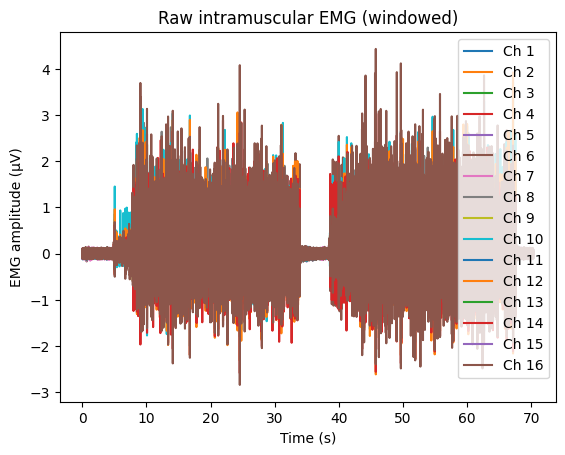

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Turn SIG_numeric (16, 719998) into (n_samples, n_ch) ---
sig_mat = SIG_numeric           # shape = (n_ch, n_samples)
n_ch, n_samples = sig_mat.shape
data = sig_mat.T                # shape = (n_samples, n_ch)

# --- 2. Window the segment ---
s0 = int(np.squeeze(startSIGInt))   # e.g. 0 or your start index
s1 = int(np.squeeze(stopSIGInt))    # e.g. 719998 or your end index
# seg = data[s0:s1, :]              # shape = (window_samples, n_ch)
seg = data
t = np.arange(n_samples) / fsamp


# --- 3. Build time vector ---
t = np.arange(seg.shape[0]) / fsamp

# --- 4. Plot all channels ---
plt.figure()
for ch in range(seg.shape[1]):
    plt.plot(t, seg[:, ch], label=f'Ch {ch+1}')
plt.xlabel('Time (s)')
plt.ylabel('EMG amplitude (µV)')
plt.title('Raw intramuscular EMG (windowed)')
if seg.shape[1] > 1:
    plt.legend()
plt.show()


# Isolating Stimuli Response

In [27]:
import glob
import os
import numpy as np

# adapt this to wherever your files live:
mat_paths = glob.glob("data/**/*.mat", recursive=True)
mat_paths = [p for p in mat_paths if p.endswith("cut_C.mat")]

lengths = []
info = []

for p in mat_paths:
    d = load_intramuscular_mat(p)
    # build SIG_numeric just like before:
    SIG = d['SIG']
    # flatten object-dtype if needed, as you did:
    if isinstance(SIG, np.ndarray) and SIG.dtype == object:
        # each row is one channel, each el a 1D array
        arr = np.vstack([np.array(el) for el in SIG.flat])
        SIG_num = arr
    else:
        SIG_num = np.array(SIG)
    # assume SIG_num shape = (n_ch, n_samples)
    n_samples = SIG_num.shape[1] if SIG_num.ndim == 2 else SIG_num.shape[0]
    lengths.append(n_samples)
    info.append((os.path.basename(p), n_samples))

# Report
unique_lengths = sorted(set(lengths))
print("Found {} files with suffix cut_C.mat".format(len(mat_paths)))
print("Unique sample-lengths:", unique_lengths)

# Divisibility check
for L in unique_lengths:
    print(f" • {L} samples → ", end="")
    print("even split ok" if L % 2 == 0 else "NOT divisible by 2!")

# Optional: show a quick table of each file
import pandas as pd
df = pd.DataFrame(info, columns=["filename","n_samples"])
display(df)


Found 6 files with suffix cut_C.mat
Unique sample-lengths: [529998, 609998, 719998]
 • 529998 samples → even split ok
 • 609998 samples → even split ok
 • 719998 samples → even split ok


,filename,n_samples
0,180Deg_F1_2_plateau_iAll_MUedit.mat_decomp_70I...,529998
1,90Deg_F1_1_plateau_iAll_MUedit.mat_decomp_70It...,529998
2,90Deg_F1_1_plateau_iAll_MUedit.mat_decomp_100I...,609998
3,180Deg_F1_1_plateau_iAll_MUedit.mat_decomp_100...,609998
4,90Deg_F2_2_plateau_iAll_MUedit.mat_decomp_100I...,719998
5,180Deg_F1_2_plateau_iAll_MUedit.mat_decomp_100...,609998


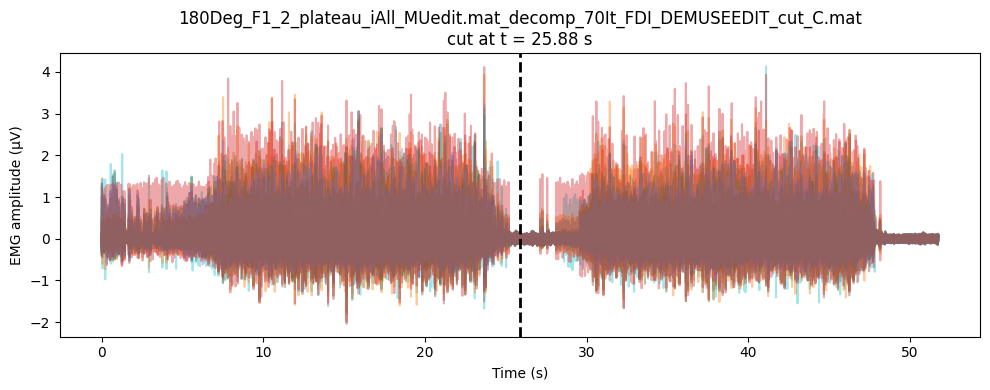

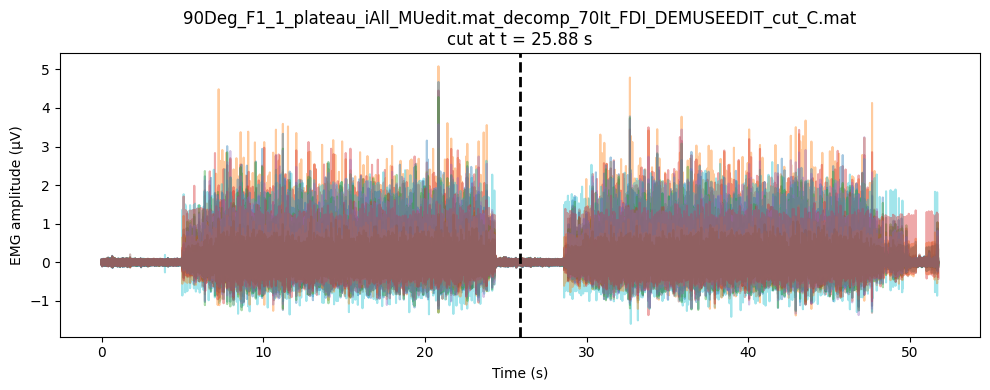

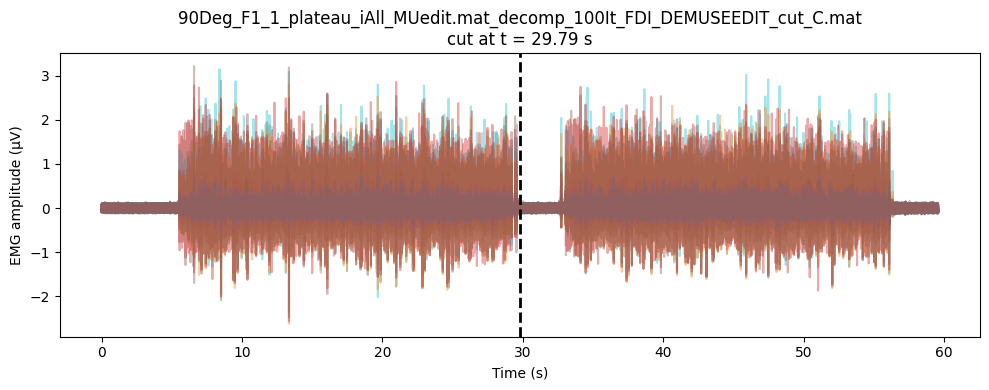

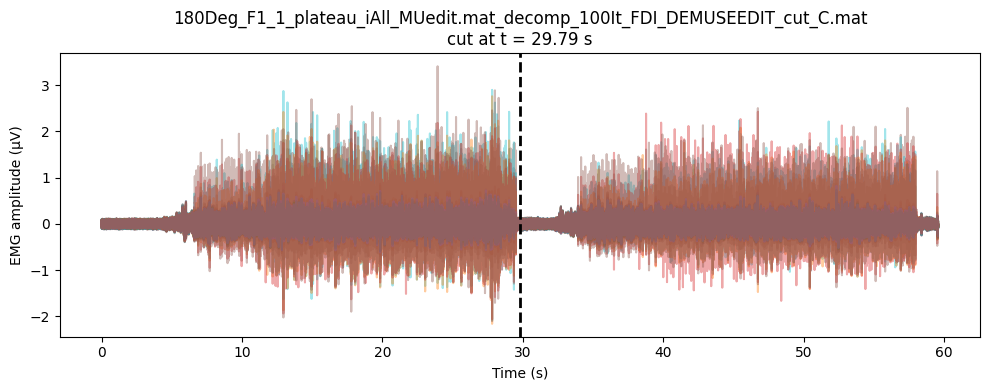

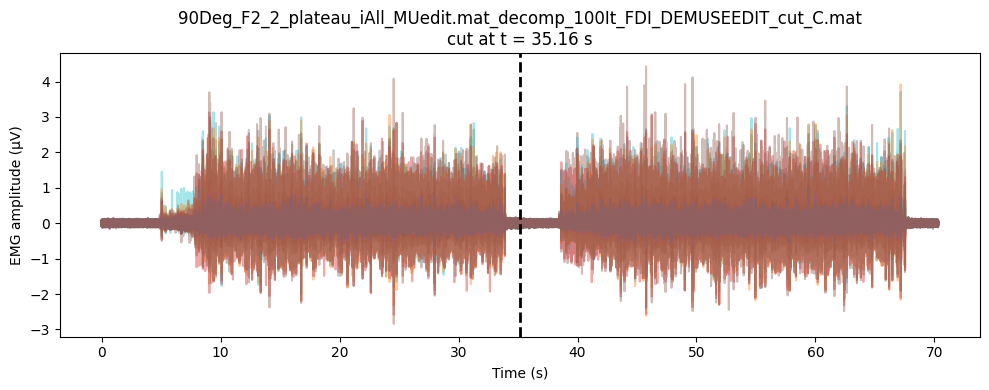

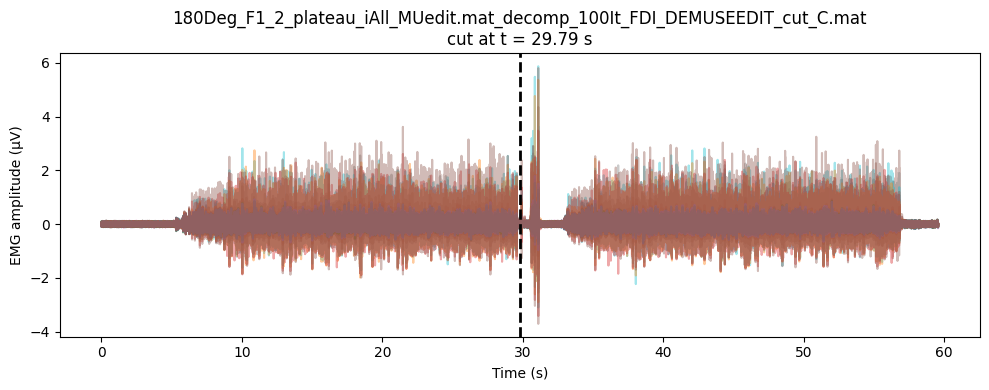

In [28]:
import glob
import os
import numpy as np
import matplotlib.pyplot as plt

# 1) Gather all cleaned .mat paths
mat_paths = glob.glob("data/**/*.mat", recursive=True)
mat_paths = [p for p in mat_paths if p.endswith("cut_C.mat")]

for p in mat_paths:
    # 2) Load and build SIG_numeric
    d = load_intramuscular_mat(p)
    SIG = d['SIG']
    if isinstance(SIG, np.ndarray) and SIG.dtype == object:
        SIG_num = np.vstack([np.array(el) for el in SIG.flat])   # shape = (n_ch, n_samples)
    else:
        SIG_num = np.array(SIG)
    
    # 3) Set up dimensions & time
    n_ch, n_samples = SIG_num.shape
    half = n_samples // 2
    t = np.arange(n_samples) / fsamp

    # 4) Plot all channels with midpoint
    plt.figure(figsize=(10, 4))
    for ch in range(n_ch):
        plt.plot(t, SIG_num[ch, :], alpha=0.4, label=f'Ch {ch+1}')
    plt.axvline(half / fsamp, color='k', linestyle='--', linewidth=2)
    
    # 5) Annotate
    basename = os.path.basename(p)
    plt.title(f"{basename}\ncut at t = {half/fsamp:.2f} s")
    plt.xlabel("Time (s)")
    plt.ylabel("EMG amplitude (µV)")
    if n_ch <= 8:
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


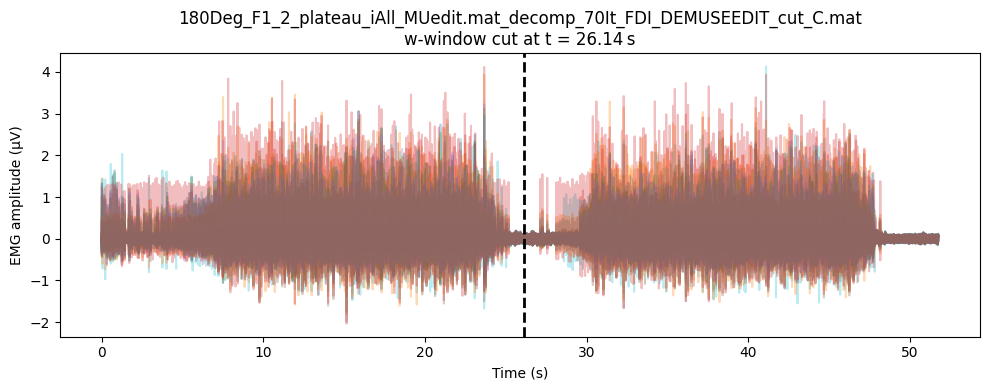

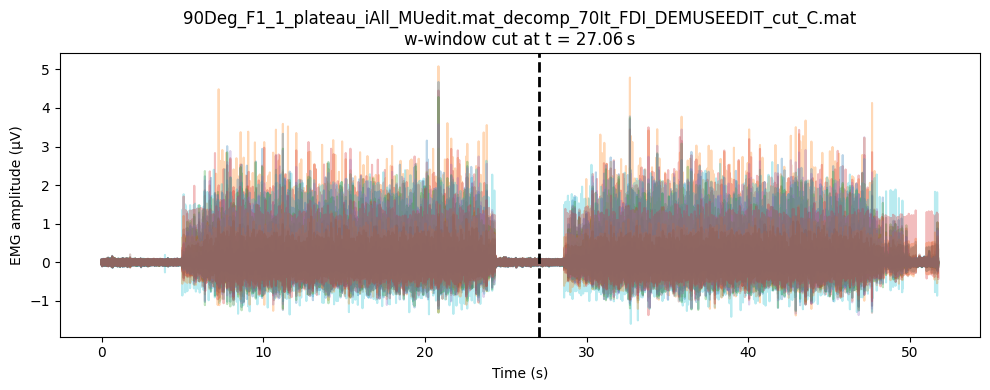

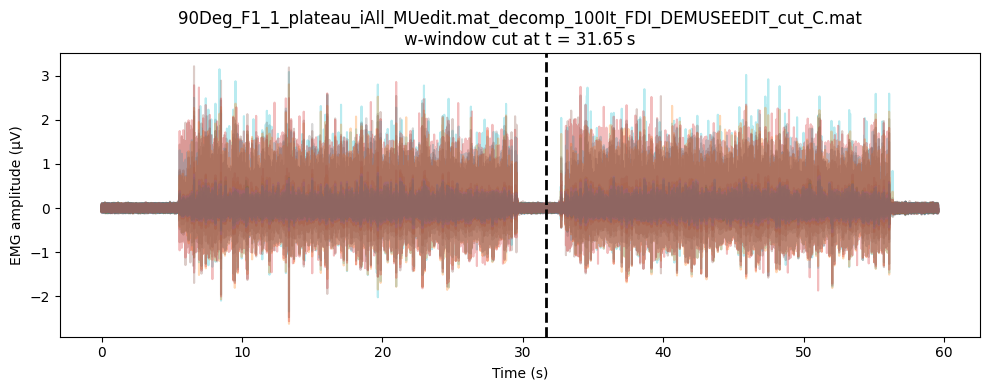

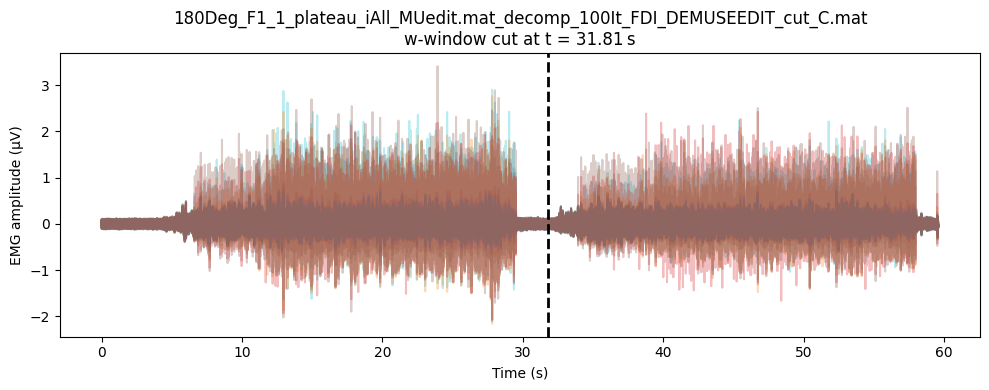

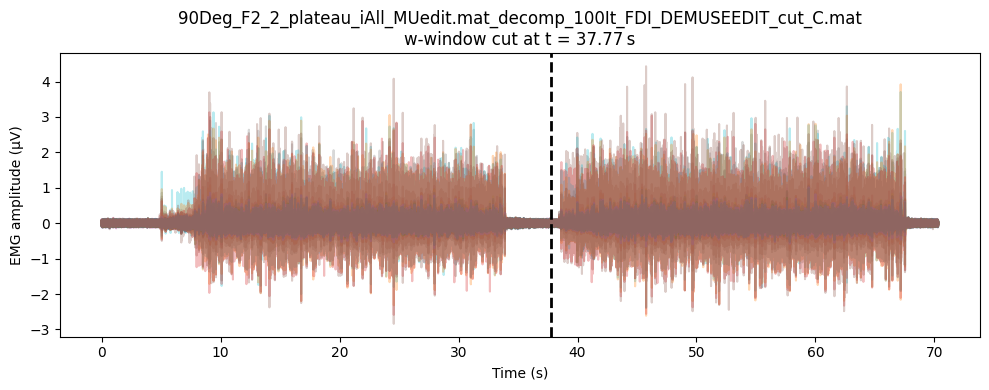

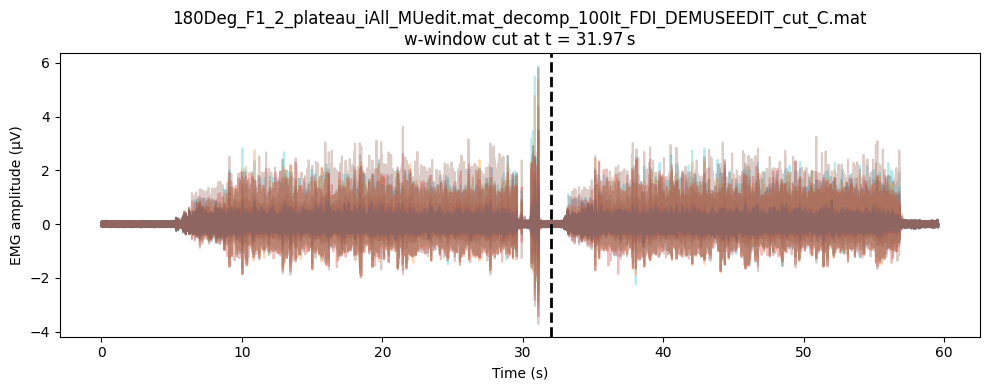

In [29]:
import glob, os
import numpy as np
import matplotlib.pyplot as plt

# PARAMETERS
search_radius_s = 5            # still look ±5 s around nominal midpoint
window_s        = 1.0          # length of flat window we want (sec)
mat_paths = glob.glob("data/**/*.mat", recursive=True)
mat_paths = [p for p in mat_paths if p.endswith("cut_C.mat")]

for p in mat_paths:
    # --- load and stack into SIG_num (n_ch, n_samples) ---
    d = load_intramuscular_mat(p)
    SIG = d['SIG']
    if isinstance(SIG, np.ndarray) and SIG.dtype == object:
        SIG_num = np.vstack([np.array(el) for el in SIG.flat])
    else:
        SIG_num = np.array(SIG)
    n_ch, n_samples = SIG_num.shape

    # --- compute envelope ---
    env = np.mean(np.abs(SIG_num), axis=0)

    # --- define search region around nominal midpoint ---
    half = n_samples // 2
    w    = int(search_radius_s * fsamp)
    lo, hi = max(0, half - w), min(n_samples, half + w)

    # --- sliding‐window RMS or mean‐abs-env over window_s ---
    win = int(window_s * fsamp)
    # convolve the envelope with a flat window to get mean-env per window start
    kernel = np.ones(win) / win
    mean_env = np.convolve(env, kernel, mode='valid')  # length = n_samples - win + 1

    # --- restrict to our search band and find the window with minimal mean_env ---
    valid_idx = np.arange(lo, hi-win+1)
    sub_env   = mean_env[valid_idx]
    best_i    = valid_idx[np.argmin(sub_env)]
    # center of that window:
    cut_idx   = best_i + win//2
    cut_t     = cut_idx / fsamp

    # --- plot ---
    t = np.arange(n_samples) / fsamp
    plt.figure(figsize=(10,4))
    for ch in range(n_ch):
        plt.plot(t, SIG_num[ch], alpha=0.3)
    plt.axvline(cut_t, color='k', linestyle='--', linewidth=2)

    fname = os.path.basename(p)
    plt.title(f"{fname}\nw‐window cut at t = {cut_t:.2f} s")
    plt.xlabel("Time (s)")
    plt.ylabel("EMG amplitude (µV)")
    plt.tight_layout()
    plt.show()


In [31]:
import glob, os, re
import numpy as np
from scipy.io import savemat

outdir = "samples"
os.makedirs(outdir, exist_ok=True)

# parameters for auto-cut
search_radius_s = 5
window_s        = 1.0

# find only the cleaned files under data/
mat_paths = glob.glob("data/**/*.mat", recursive=True)
mat_paths = [p for p in mat_paths if p.endswith("cut_C.mat")]

for p in mat_paths:
    # 1) participant ID from path, e.g. "P1" or "P3"
    participant = os.path.normpath(p).split(os.sep)[1]
    # 2) original stem, e.g. "90Deg_F2_2_plateau_iAll_MUedit…_cut_C"
    orig_stem   = os.path.splitext(os.path.basename(p))[0]
    
    # 3) parse direction and strength
    m_dir = re.search(r"(\d+)Deg", orig_stem)
    m_F   = re.search(r"_F([12])_", orig_stem)
    if not (m_dir and m_F):
        print(f"Skipping {orig_stem}: can't parse labels")
        continue
    direction = int(m_dir.group(1))
    strength  = int(m_F.group(1))
    
    # 4) load and stack into numeric array SIG_num (n_ch, n_samples)
    d   = load_intramuscular_mat(p)
    SIG = d['SIG']
    if isinstance(SIG, np.ndarray) and SIG.dtype == object:
        SIG_num = np.vstack([np.array(el) for el in SIG.flat])
    else:
        SIG_num = np.array(SIG)
    n_ch, n_samples = SIG_num.shape
    
    # 5) compute the envelope and find flattest 1 s window around half
    env   = np.mean(np.abs(SIG_num), axis=0)
    half  = n_samples // 2
    w     = int(search_radius_s * fsamp)
    lo, hi = max(0, half - w), min(n_samples, half + w)
    win   = int(window_s * fsamp)
    mean_env = np.convolve(env, np.ones(win)/win, mode='valid')
    valid   = np.arange(lo, hi - win + 1)
    best_i  = valid[np.argmin(mean_env[valid])]
    cut_idx = best_i + win//2
    
    # 6) split into two halves
    seg1 = SIG_num[:, :cut_idx]
    seg2 = SIG_num[:, cut_idx:]
    
    # 7) unique output names
    out1 = os.path.join(outdir, f"{participant}_{orig_stem}_trial1.mat")
    out2 = os.path.join(outdir, f"{participant}_{orig_stem}_trial2.mat")
    
    # 8) save
    savemat(out1, {
        "SIG": seg1,
        "fsamp": float(fsamp),
        "participant": participant,
        "direction": direction,
        "strength": strength
    })
    savemat(out2, {
        "SIG": seg2,
        "fsamp": float(fsamp),
        "participant": participant,
        "direction": direction,
        "strength": strength
    })
    print(f"Saved {out1}  ({seg1.shape}), {out2}  ({seg2.shape})")


Saved samples/P3_180Deg_F1_2_plateau_iAll_MUedit.mat_decomp_70It_FDI_DEMUSEEDIT_cut_C_trial1.mat  ((16, 267652)), samples/P3_180Deg_F1_2_plateau_iAll_MUedit.mat_decomp_70It_FDI_DEMUSEEDIT_cut_C_trial2.mat  ((16, 262346))
Saved samples/P3_90Deg_F1_1_plateau_iAll_MUedit.mat_decomp_70It_FDI_DEMUSEEDIT_cut_C_trial1.mat  ((16, 277082)), samples/P3_90Deg_F1_1_plateau_iAll_MUedit.mat_decomp_70It_FDI_DEMUSEEDIT_cut_C_trial2.mat  ((16, 252916))
Saved samples/P1_90Deg_F1_1_plateau_iAll_MUedit.mat_decomp_100It_FDI_DEMUSEEDIT_cut_C_trial1.mat  ((16, 324065)), samples/P1_90Deg_F1_1_plateau_iAll_MUedit.mat_decomp_100It_FDI_DEMUSEEDIT_cut_C_trial2.mat  ((16, 285933))
Saved samples/P1_180Deg_F1_1_plateau_iAll_MUedit.mat_decomp_100It_FDI_DEMUSEEDIT_cut_C_trial1.mat  ((16, 325693)), samples/P1_180Deg_F1_1_plateau_iAll_MUedit.mat_decomp_100It_FDI_DEMUSEEDIT_cut_C_trial2.mat  ((16, 284305))
Saved samples/P1_90Deg_F2_2_plateau_iAll_MUedit.mat_decomp_100It_FDI_DEMUSEEDIT_cut_C_trial1.mat  ((16, 386748)), sa

# Linear Model for Simple Predictions

In [32]:
X = []        # will hold (n_channels × n_time) flattened or feature vectors  
y_force = []  # 1 for F1, 2 for F2  
y_dir   = []  # one of {90, 180, 270}  
for fn in glob.glob("samples/*.mat"):
    d = loadmat(fn, squeeze_me=True)
    sig = d["SIG"]             # (n_ch, n_t)
    X.append(sig)
    y_force.append(d["strength"])
    y_dir.append(d["direction"])


In [36]:
import glob
import numpy as np
from scipy.io import loadmat
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.model_selection import cross_val_score, StratifiedKFold

# 1) Find the minimum sample‐length across all splits
mat_paths = glob.glob("samples/*.mat")
lengths = []
for fn in mat_paths:
    d = loadmat(fn, squeeze_me=True)
    sig = d['SIG']
    # sig shape = (n_ch, n_t)
    n_t = sig.shape[1]
    lengths.append(n_t)

min_t = min(lengths)
print(f"Cropping every sample to first {min_t} time‐points")

# 2) Build X_raw and labels
X_raw   = []
y_force = []
y_dir   = []
for fn in mat_paths:
    d   = loadmat(fn, squeeze_me=True)
    sig = d['SIG'][:, :min_t]         # crop or truncate to (n_ch, min_t)
    X_raw.append(sig.flatten())
    y_force.append(int(d['strength']))
    y_dir.append(int(d['direction']))

X_raw   = np.vstack(X_raw)
y_force = np.array(y_force)
y_dir   = np.array(y_dir)

# 3) Cross‐validated linear models
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=0)

# 3a) Force (binary)
clf_force = make_pipeline(
    StandardScaler(),
    LogisticRegression(penalty='l2', solver='liblinear')
)
scores_f = cross_val_score(clf_force, X_raw, y_force, cv=cv, scoring='accuracy')
print("Force    accuracy:", scores_f.mean())

# 3b) Direction (multi‐class)
clf_dir = make_pipeline(
    StandardScaler(),
    LogisticRegression(penalty='l2', multi_class='multinomial', solver='lbfgs')
)
scores_d = cross_val_score(clf_dir, X_raw, y_dir, cv=cv, scoring='accuracy')
print("Direction accuracy:", scores_d.mean())

# 3c) Optional: regression on angle
reg = make_pipeline(
    StandardScaler(),
    Ridge(alpha=1.0)
)
scores_r = cross_val_score(reg, X_raw, y_dir, cv=cv, scoring='neg_mean_squared_error')
print("Angle   MSE:", -scores_r.mean())


Cropping every sample to first 252916 time‐points


/Users/juliahagen/Library/Caches/pypoetry/virtualenvs/fd-intraeeg-SfzCdUtK-py3.10/lib/python3.10/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(


Force    accuracy: 0.49999999999999994


/Users/juliahagen/Library/Caches/pypoetry/virtualenvs/fd-intraeeg-SfzCdUtK-py3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1254: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/juliahagen/Library/Caches/pypoetry/virtualenvs/fd-intraeeg-SfzCdUtK-py3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1254: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/juliahagen/Library/Caches/pypoetry/virtualenvs/fd-intraeeg-SfzCdUtK-py3.10/lib/python3.10/site-packages/sklearn/linear_model/_logis

Direction accuracy: 0.41666666666666663


/Users/juliahagen/Library/Caches/pypoetry/virtualenvs/fd-intraeeg-SfzCdUtK-py3.10/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:252: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/juliahagen/Library/Caches/pypoetry/virtualenvs/fd-intraeeg-SfzCdUtK-py3.10/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:252: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/juliahagen/Library/Caches/pypoetry/virtualenvs/fd-intraeeg-SfzCdUtK-py3.10/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:252: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Angle   MSE: 2378.581756591797


/Users/juliahagen/Library/Caches/pypoetry/virtualenvs/fd-intraeeg-SfzCdUtK-py3.10/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:252: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
